In [80]:
import cv2 as cv
import numpy as np
from PIL import Image, ImageDraw, ImageStat, ImageOps

center: [258.5 218.5]	target size: [320. 240.]


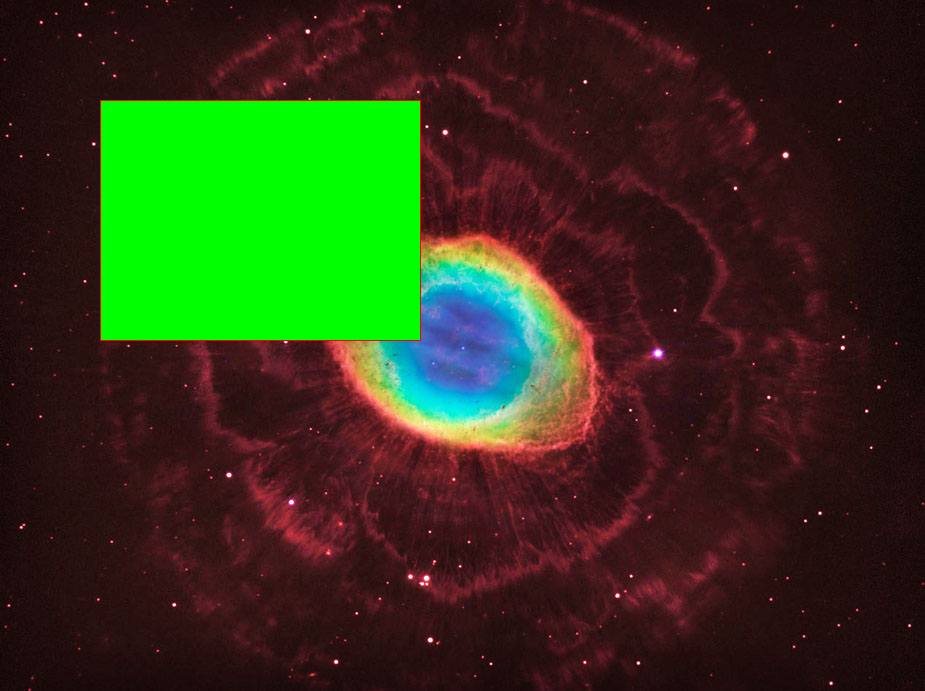

In [90]:
def _get_zero_center_based_bbox(bbox):
    return np.float32((bbox[0] - 1 + (bbox[2] - 1) / 2.0,
                       bbox[1] - 1 + (bbox[3] - 1) / 2.0,
                       *bbox[2:]))

image = Image.open('../images/nebula.jpg')
bbox = np.array([100, 100, 320, 240])
bbox_converted = _get_zero_center_based_bbox(bbox)
center, target_size = bbox_converted[:2], bbox_converted[2:]
print(f'center: {center}\ttarget size: {target_size}')

top_left = tuple(bbox[:2])
bottom_right =  tuple(bbox[:2] + bbox[2:])
image_draw = ImageDraw.Draw(image)
image_draw.rectangle((top_left, bottom_right), fill='#00ff00', outline='red')
image

In [94]:
config_context = 0.5
config_instance_size = 255
config_exemplar_size = 127

context = config_context * np.sum(target_size)
exemplar_with_context_size = np.sqrt(np.prod(target_size + context))
scale = exemplar_with_context_size / config_exemplar_size
instance_size_new = round(config_instance_size * scale)

half_size = (instance_size_new - 1) / 2.0
bbox_corners = np.round(np.concatenate((
    np.round(center - half_size),
    np.round(center - half_size) + instance_size_new
))).astype(int)
bbox_corners

array([-302, -342,  820,  780])

In [95]:
image.size

(925, 691)

In [96]:
pads = np.concatenate((-bbox_corners[:2], bbox_corners[2:] - image.size))
pads

array([ 302,  342, -105,   89])

In [97]:
n_pad = max(0, int(np.max(pads)))
n_pad

342

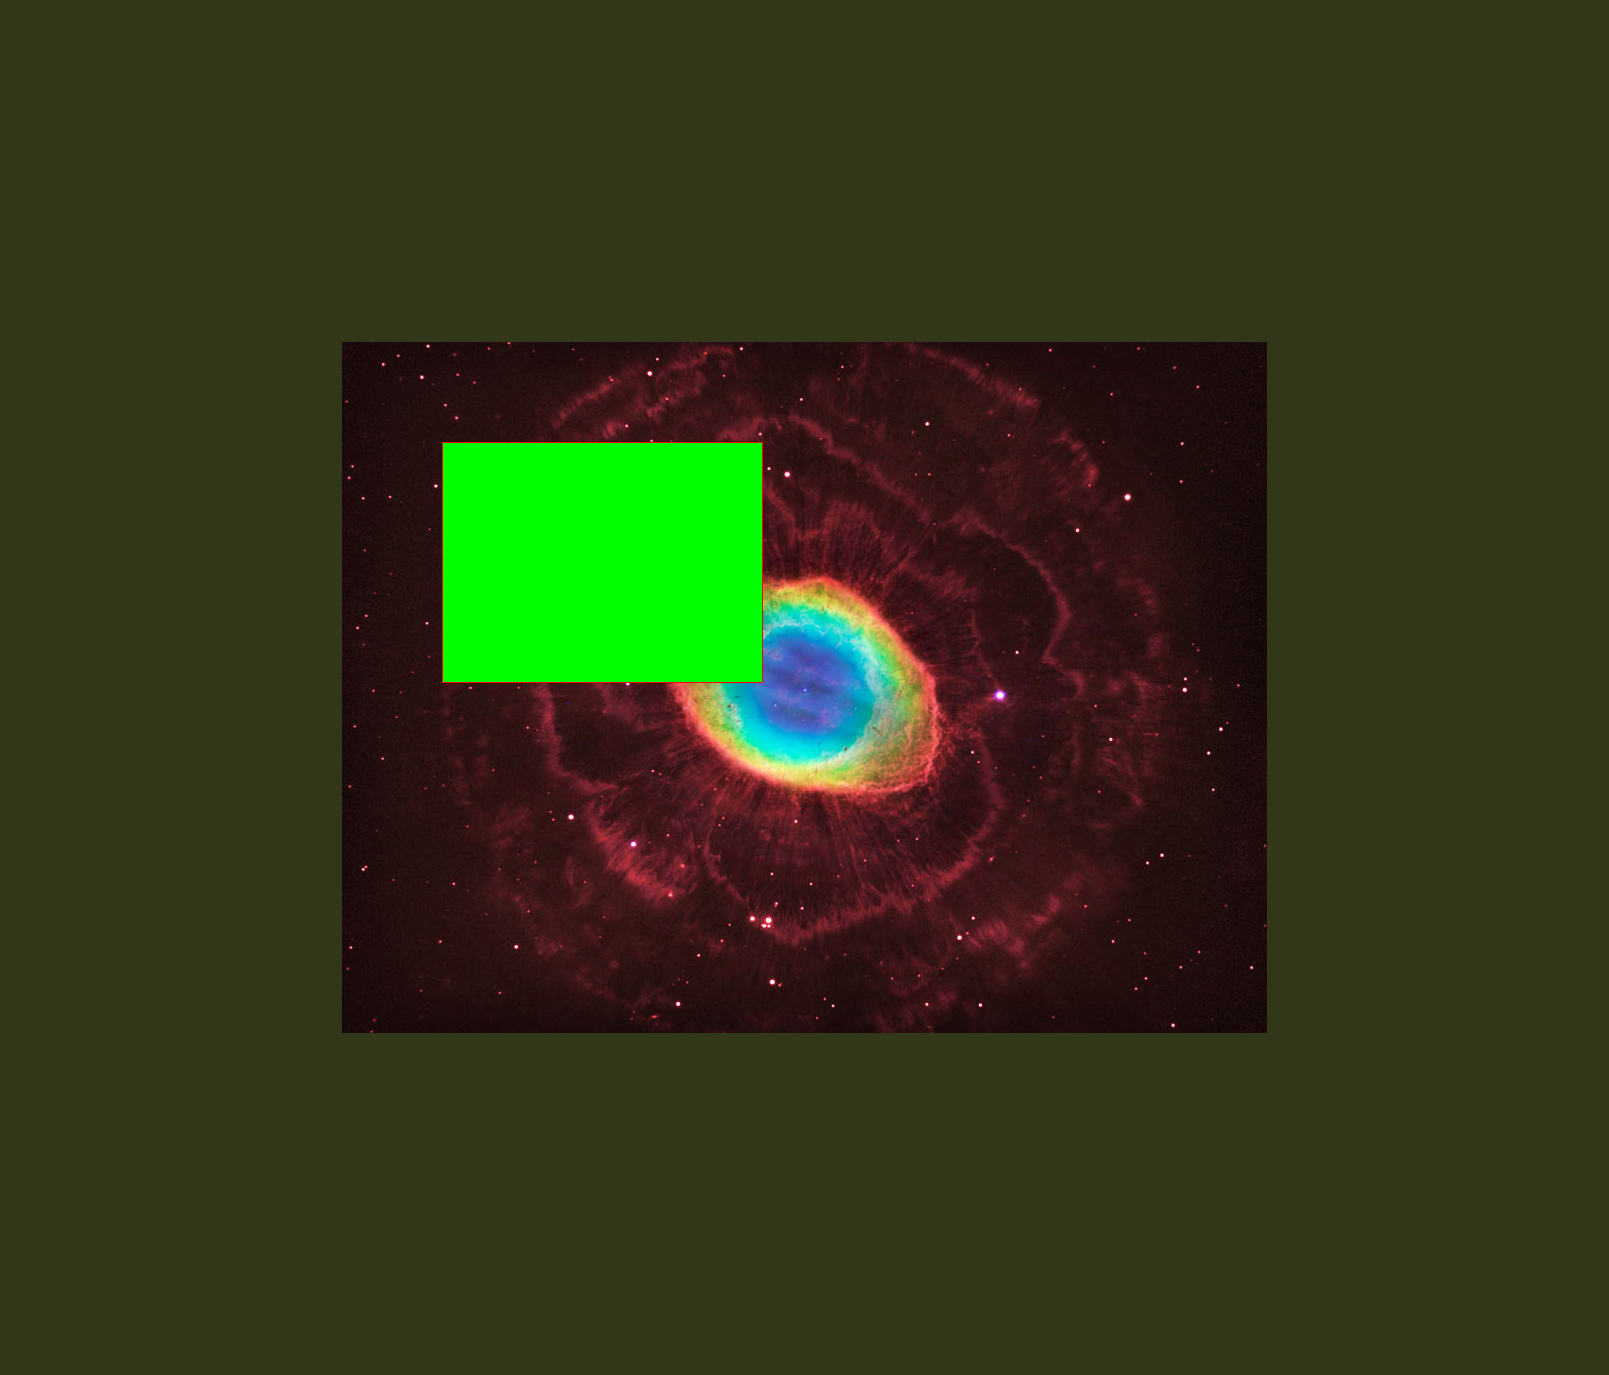

In [98]:
avg_color = tuple(map(lambda c: int(round(c)), ImageStat.Stat(image).mean))
image_ex = ImageOps.expand(image, border=n_pad, fill=avg_color)
image_ex

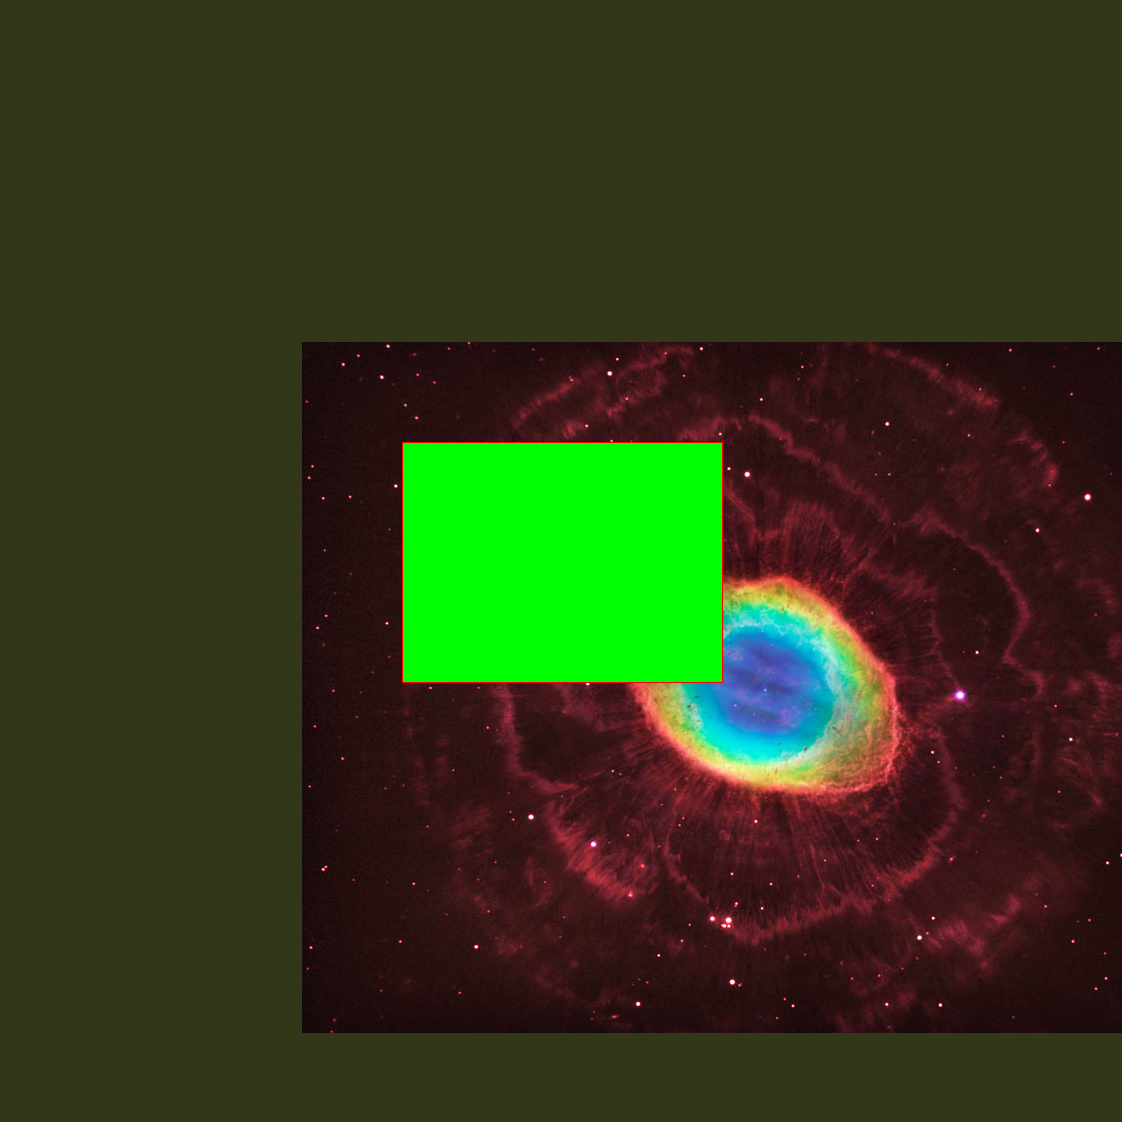

In [99]:
corners = tuple((bbox_corners + n_pad).astype(int))
patch = image_ex.crop(corners)
patch

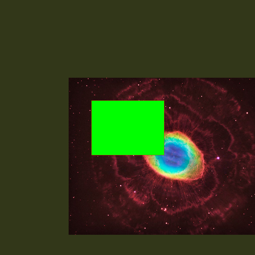

In [100]:
out_size = (config_instance_size, config_instance_size)
patch = patch.resize(out_size, Image.BICUBIC)
patch

In [89]:
patch.size

(255, 255)